In [1]:
#this is to make the flags the same between two sets of data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
import uvtools

In [3]:
datadir1 = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458098_sliced/'
datadir2 = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/2458099_sliced/'

In [4]:
uvd1 = UVData()
uvd2 = UVData()

In [5]:
uvd1.read(datadir1 + 'zen.010601_011009.calibrated.HH.uvfits')
uvd2.read(datadir2 + 'zen.010601_011009.calibrated.HH.uvfits')

In [6]:
final_flags = np.logical_or(uvd1.flag_array, uvd2.flag_array)

In [7]:
print(np.sum(final_flags))
np.shape(final_flags)

100495904


(31694, 1, 1024, 4)

In [8]:
#set original flag data equal to the new flag data made with the logical or 
uvd1.flag_array = final_flags
uvd2.flag_array = final_flags

In [9]:
#writing out the data saves the change made by setting the old data equal to the new data
uvd1.write_uvfits(datadir1+'zen.010601_011009.calibrated.flags.HH.uvfits')
uvd2.write_uvfits(datadir2+'zen.010601_011009.calibrated.flags.HH.uvfits')

In [10]:
#reading back in the new data to see if it was done correctly
uvdtest1 = UVData()
uvdtest2 = UVData()
uvdtest1.read(datadir1+'zen.010601_011009.calibrated.flags.HH.uvfits')
uvdtest2.read(datadir2+'zen.010601_011009.calibrated.flags.HH.uvfits')

In [11]:
#testing to see if flags turned out to be the same by plotting 

In [12]:
vis = uvdtest1.select(bls=(70,71,'xx'), inplace=False)
vis2 = uvdtest2.select(bls=(70,71,'xx'), inplace=False)

In [13]:
vis_data = vis.data_array.squeeze()
flag_data = np.array(~vis.flag_array.squeeze(), dtype='float64')
vis2_data = vis2.data_array.squeeze()
flag2_data = np.array(~vis2.flag_array.squeeze(), dtype='float64')

divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide


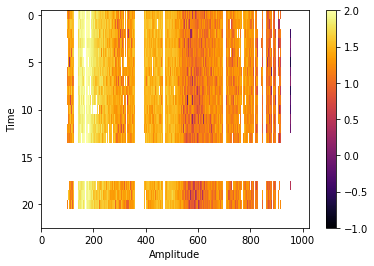

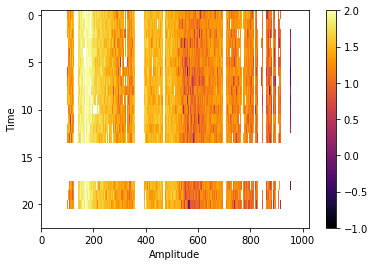

In [14]:
plt.figure()
plt.imshow(np.log10(np.abs(vis_data)/flag_data),aspect='auto', vmin=-1, vmax=2, cmap='inferno')
plt.xlabel('Amplitude')
plt.ylabel('Time')
plt.colorbar()
plt.figure()
plt.imshow(np.log10(np.abs(vis2_data)/flag2_data),aspect='auto', vmin=-1, vmax=2, cmap='inferno')
plt.xlabel('Amplitude')
plt.ylabel('Time')
plt.colorbar()
#looks good. no logical or needed for the flags anymore, flags are the same 

In [15]:
#this is to fix the phasing

In [16]:
dec = uvdtest1.telescope_location_lat_lon_alt[0]
ra = np.median(uvdtest1.lst_array)
print(dec)
print(ra)

-0.5361917820434727
0.29741051260189366


In [17]:
dec2 = uvdtest2.telescope_location_lat_lon_alt[0]
ra2 = np.median(uvdtest2.lst_array)
print(dec2)
print(ra2)

-0.5361917820434727
0.2973742080277595


In [18]:
print(uvdtest1.phase_type)
print(uvdtest2.phase_type)

phased
phased


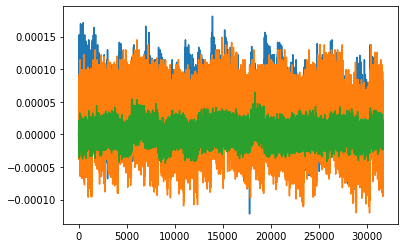

In [19]:
plt.plot(uvdtest1.uvw_array - uvdtest2.uvw_array)

In [20]:
#change from phased to drift so specific ra0 and dec0 can be set
uvdtest1.unphase_to_drift()
uvdtest2.unphase_to_drift()

In [21]:
print(uvdtest1.phase_type)
print(uvdtest2.phase_type)

drift
drift


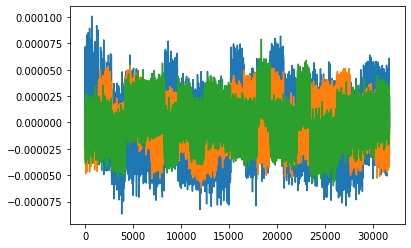

In [22]:
plt.plot(uvdtest1.uvw_array - uvdtest2.uvw_array)

In [23]:
#set defined ra0 and dec0, need to copy because this alters the original data set 
from copy import deepcopy

In [24]:
uvdphased1 = deepcopy(uvdtest1)
uvdphased2 = deepcopy(uvdtest2)

In [25]:
uvdphased1.phase(ra,dec)
uvdphased2.phase(ra,dec)

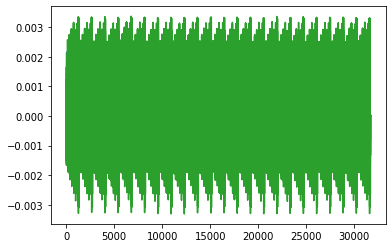

In [26]:
plt.plot(uvdphased1.uvw_array - uvdphased2.uvw_array)

In [ ]:
#writing out the new altered data that contains matching flags and matching phases (I hope)
uvdphased1.write_uvfits(datadir1 + 'zen.010601_011009.calibrated.phased.HH.uvfits')
uvdphased2.write_uvfits(datadir2 + 'zen.010601_011009.calibrated.phased.HH.uvfits')